# Data Preprocessing for Humpback Whale YouTube Video Dataset 

## NOTE: As of Feb 23, all video clips (rel + non rel) have been moved to video_clips folder
the old separate folders for relevant video clips + image frames, as well as irrelevant video clips + image frames, can now be found under old_material/video_clips_sep_folder
those are the folders that this data preprocessing used when they were in the main directory.



# Set Up
---

In [74]:
# !pip install pytube3

In [1]:
#to reflect changes made in modules
%load_ext autoreload
%autoreload 2

In [2]:
from pytube import YouTube

#misc
import os
import shutil
import math
import datetime

#plots
import matplotlib.pyplot as plt
%matplotlib inline

#pandas
import pandas as pd

#image operation
import cv2


In [ ]:
# define a function for viewing images and test it
from PIL import Image

def show_image(path):
    plt.figure(figsize = (9,9))
    image =Image.open(path)
    plt.imshow(image)
    plt.show()

    
fig = plt.figure(figsize=(40,40))
for i in range(0, len(corners_t)):
    draw_corners(img[i], corners_t[i], radius)
    ax = fig.add_subplot(pos[i])
    plt.imshow(img[i])

for i in range(0, 4):
    show_image('testing_frame_extraction/humpback whale feeding_{}.jpg'.format(i))

Discussion: 
One of the problems I can foresee is how do we ensure that we are getting the best frames for classification from out videos. For example, in the frames shown above, it is very hard to tell, from a human perspective, that the whale in frame is a humpback whale. But we can clearly see this from viewing the whole video. One of the most straightforward ways to over come this issue is to extract as many frames as possible, but then we run into a resource/storage issue, as it is computationally expensive to do so. Will have to think about this a bit more... 

# EDA on downloaded subsample of relevant and irrelevant humpback whale videos - humpback_whale_videos.csv
--- 

### humpback_whale_videos_with_intervals.csv
- 113 relevant videos, 113 nonrelevant (226 total)
- cols:
    - duration_mins
    - duration_secs
    - relevant
    - num_frames
    - occurence_intervals

### EDA Plan (Conduct separately for relevant and non relevant)
- histograms of duration (print avg duration) --> use duration_mins for easier interpretability
- histograms of num_frames (print avg num_frames)

In [262]:
import pandas as pd
hw_data = pd.read_csv('humpback_whale_videos_with_intervals.csv')
hw_data.drop(columns=['Unnamed: 0'], inplace=True)
hw_data.head()

,title,url,duration_seconds,views,relevant,renamed_title,duration_mins,num_frames,occurence_intervals,double_checked,rand_sampled_intervals
0,Tom Mustill - Humpback Whales - A Detective St...,https://youtu.be/8j1HWD8KuMM,82,1909,True,video_0000.mp4,1.366667,2044,"[('0:00', '0:04'), ('0:30', '0:37'), ('1:11', ...",False,NaN
1,Suckling Humpback whale,https://youtu.be/tW_T8Z6ebmg,141,298156,True,video_0001.mp4,2.350000,0,"[('0:30', '0:40')]",False,NaN
2,Humpback Whales Lunge Feed Among Pod of Dolphi...,https://youtu.be/oSGhnD5kmAg,104,1117,True,video_0002.mp4,1.733333,3111,"[('0:00', '0:10'), ('0:42', '0:46')]",False,NaN
3,Humpback whales 2017 - Best of by Moorea Ocean...,https://youtu.be/6eWwFNq4i_c,224,2595,True,video_0003.mp4,3.733333,6719,"[('0:05', '0:20'), ('0:28', '0:33')]",False,NaN
4,Amazing! Humpback Whales Lunge Feeding up clos...,https://youtu.be/RMaMmynj76s,75,1005329,True,video_0004.mp4,1.250000,0,"[('0:00', '0:15'), ('0:35', '0:40')]",False,NaN


In [47]:
color_scheme = {'navy': '#34495e', 'muted_red': '#a34646', 'green': '#2f8045', 'orange': '#e74c3c' , 'purple': '#ab5fba', 'blue': '#319de0' }

In [48]:
def annotate_vertical_bars(plots):
    # Iterrating over the bars one-by-one
    for bar in plots.patches:
        # Using Matplotlib's annotate function and
        # passing the coordinates where the annotation shall be done
        x_coord = bar.get_x() + bar.get_width() / 2
        y_coord = bar.get_height()

        plots.annotate(format(bar.get_height(), '.2f'),(x_coord, y_coord), 
                        ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')

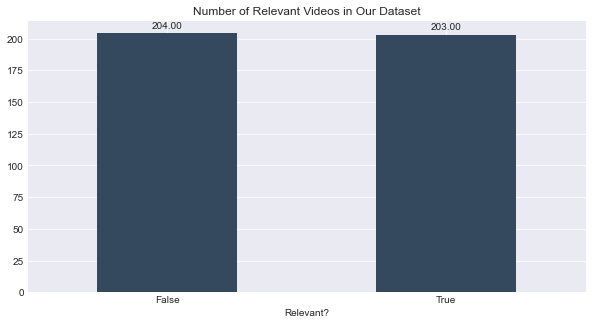

In [57]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid');
plt.figure(figsize=(10,5));

plots = hw_data['relevant'].value_counts().plot(kind = 'bar', title = 'Number of Relevant Videos in Our Dataset', color=color_scheme['navy'], xlabel='Relevant?');
plt.xticks(rotation='horizontal')
annotate_vertical_bars(plots)


A video is RELEVANT if it documents **an ENCOUNTER** with a humpback whale.

A video is IRRELEVANT if we cannot be sure the animal is a humpback whale indeed, if the video documents a carcass (being examined), or if no real humpback whale is documented

## Duration - Relevant vs Nonrelevant

### Duration (mins) Times for Relevant Videos

Stats for Relevant Videos

max duration (mins): 14.683333333333334
min duration (mins): 0.15
avg duration (mins): 2.6921182266009853
median duration (mins): 1.85




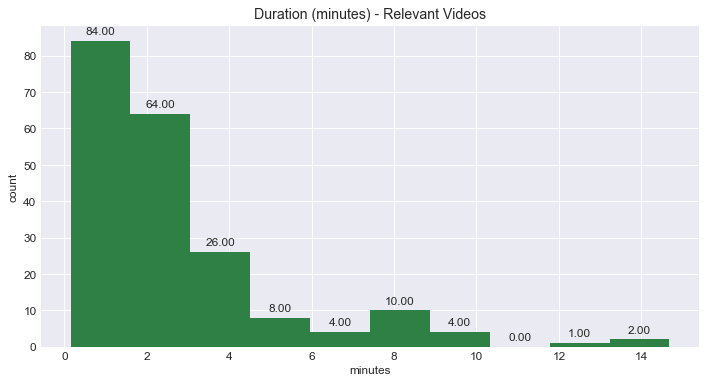

In [54]:
print('Stats for Relevant Videos\n')
print('max duration (mins):', hw_data[hw_data['relevant'] == True]['duration_mins'].max())
print('min duration (mins):', hw_data[hw_data['relevant'] == True]['duration_mins'].min())
print('avg duration (mins):', hw_data[hw_data['relevant'] == True]['duration_mins'].mean())
print('median duration (mins):', hw_data[hw_data['relevant'] == True]['duration_mins'].median())
print('\n')

plt.figure(figsize=(10,5), dpi=85)
plots = hw_data[hw_data['relevant'] == True]['duration_mins'].plot.hist(bins=10, title='Duration (minutes) - Relevant Videos', color=color_scheme['green']);
plt.xlabel('minutes'); plt.ylabel('count');

annotate_vertical_bars(plots)

### Duration (mins) Times for Irrelevant Videos

Stats for Non Relevant Videos

max duration (mins): 60.36666666666667
min duration (mins): 0.05
avg duration (mins): 5.027532679738563
median duration (mins): 2.6333333333333333




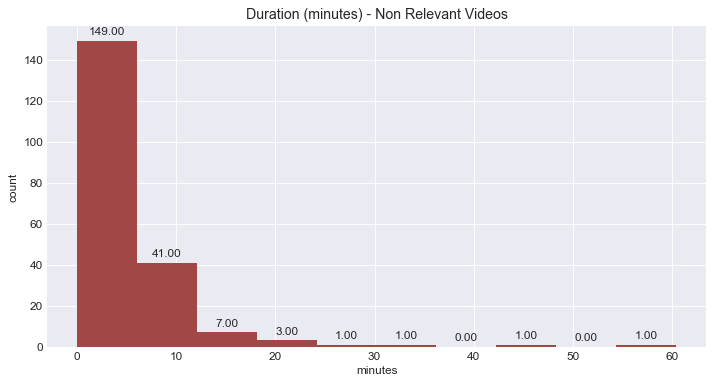

In [58]:
print('Stats for Non Relevant Videos\n')
print('max duration (mins):', hw_data[hw_data['relevant'] == False]['duration_mins'].max())
print('min duration (mins):', hw_data[hw_data['relevant'] == False]['duration_mins'].min())
print('avg duration (mins):', hw_data[hw_data['relevant'] == False]['duration_mins'].mean())
print('median duration (mins):', hw_data[hw_data['relevant'] == False]['duration_mins'].median())
print('\n')

plt.figure(figsize=(10,5), dpi=85)
plots = hw_data[hw_data['relevant'] == False]['duration_mins'].plot.hist(bins=10, title='Duration (minutes) - Non Relevant Videos', color = color_scheme['muted_red']);
plt.xlabel('minutes'); plt.ylabel('count');
annotate_vertical_bars(plots)

## Number of Frames

### Number of Frames Available Across Entire Duration of Video - Relevant Videos

Stats for Relevant Videos

--------------------------------------------------------------------------------
| Max Num Frames  | Min Num Frames  | Avg Num Frames  |  Median Num Frames |
--------------------------------------------------------------------------------
       44029.00            0.00         4576.96          3074.00
--------------------------------------------------------------------------------


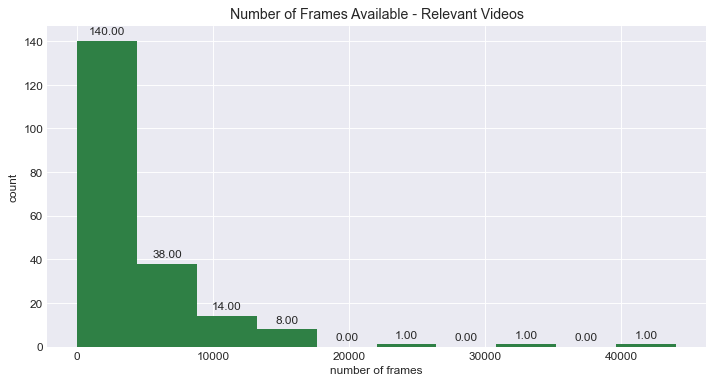

In [74]:
print('Stats for Relevant Videos\n')

print('-'*80)
print('| {:^15} | {:^15} | {:^15} | {:^15}|'.format('Max Num Frames','Min Num Frames','Avg Num Frames',' Median Num Frames ',))
print('-'*80)

print('{:>15.2f} {:>15.2f} {:>15.2f}  {:>15.2f}'.format(
                                                        hw_data[hw_data['relevant'] == True]['num_frames'].max(),
                                                        hw_data[hw_data['relevant'] == True]['num_frames'].min(),
                                                        hw_data[hw_data['relevant'] == True]['num_frames'].mean(),
                                                        hw_data[hw_data['relevant'] == True]['num_frames'].median()
                                                        ))
print('-'*80)

plt.figure(figsize=(10,5), dpi=85)
plots = hw_data[hw_data['relevant'] == True]['num_frames'].plot.hist(bins=10, title='Number of Frames Available - Relevant Videos', color = color_scheme['green']);

plt.xlabel('number of frames'); plt.ylabel('count');
annotate_vertical_bars(plots)

### Number of Frames for Irrelevant Videos

Stats for Non Relevant Videos

--------------------------------------------------------------------------------
| Max Num Frames  | Min Num Frames  | Avg Num Frames  |  Median Num Frames |
--------------------------------------------------------------------------------
      118385.00           95.00         9899.17          4330.00
--------------------------------------------------------------------------------


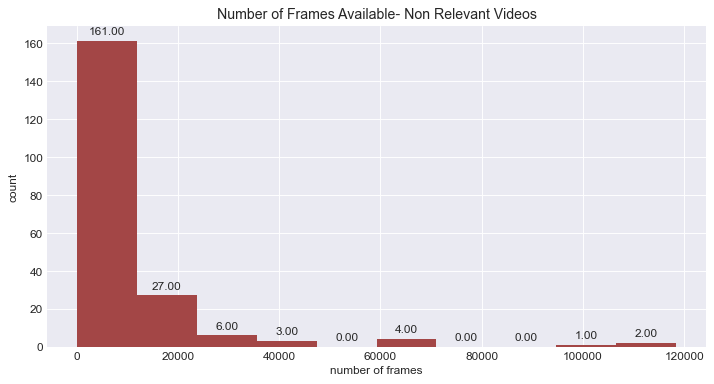

In [73]:
print('Stats for Non Relevant Videos\n')

print('-'*80)
print('| {:^15} | {:^15} | {:^15} | {:^15}|'.format('Max Num Frames','Min Num Frames','Avg Num Frames',' Median Num Frames ',))
print('-'*80)

print('{:>15.2f} {:>15.2f} {:>15.2f}  {:>15.2f}'.format(
                                                        hw_data[hw_data['relevant'] == False]['num_frames'].max(),
                                                        hw_data[hw_data['relevant'] == False]['num_frames'].min(),
                                                        hw_data[hw_data['relevant'] == False]['num_frames'].mean(),
                                                        hw_data[hw_data['relevant'] == False]['num_frames'].median()
                                                        ))
print('-'*80)




plt.figure(figsize=(10,5), dpi=85)
plots = hw_data[hw_data['relevant'] == False]['num_frames'].plot.hist(bins=10, title='Number of Frames Available- Non Relevant Videos', color = color_scheme['muted_red']);

plt.xlabel('number of frames'); plt.ylabel('count');
annotate_vertical_bars(plots)

# Trimming videos to get video clips at intervals
-----

## 1. Clipping Relevant Videos at Occurence Intervals

In [8]:
#load in csv file that has the videos we want to get clips from

#csv = 'humpback_whale_videos_with_intervals.csv'
csv = 'humpback_whale_videos_with_intervals_additional.csv' #77 relevant, 83 irrelevant

hw_data = pd.read_csv(csv)
hw_data.drop(columns=['Unnamed: 0'], inplace=True)
hw_data.head(3)

,title,url,duration_seconds,views,relevant,renamed_title,occurence_intervals,double_checked,rand_sampled_intervals,duration_mins,num_frames
0,Humpback whale breach 7-10-14,https://youtu.be/I82N9I_SVmM,59,63,True,video_0621.mp4,"[('0:30', '0:48')]",True,NaN,0.983333,1773
1,Whales-n-Sails flipper slapping humpback whale...,https://youtu.be/bE6FxjPbYcc,78,2123,True,video_0622.mp4,"[('0:36', '0:50')]",True,NaN,1.300000,2340
2,Whales-n-Sails humpback whales July 3/10,https://youtu.be/DIesiEj4XEw,52,84,True,video_0623.mp4,"[('0:10', '0:17')]",True,NaN,0.866667,1576


In [12]:
len(hw_data[(hw_data['relevant'] == True)]) #90 new relevant clips

90

In [11]:
# possible code to trim video clips (note: will have to convert intervals in minutes to intervals in seconds (ex. (0:33, 1:00) --> (33, 60))
# source: https://stackoverflow.com/questions/37317140/cutting-out-a-portion-of-video-python
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
import numpy as np

source_folder =  "new_videos_to_add/"                 #"videos/"
dest_folder   =  "new_videos_to_add_relevant_clips/"  # "relevant_video_clips/"

# extracts clip and saves it as targetname without modifying original 
for index, row in hw_data[(hw_data['relevant'] == True)].iterrows():
    path = source_folder + row['renamed_title']
    target_name = dest_folder + row['renamed_title'] + '_clip_'
    num_clip = 0

    #convert each interval (start, end) in mins into seconds and get clip
    row_intervals = row['occurence_intervals']

    if row_intervals is not np.nan:

        for t in row_intervals.replace("[", "").replace("]", "").replace("),", ")),").split("),"):

            #format interval into a list of strings ['st:art', 'en:d']
            interval = t.replace(")", "").replace("(", "").replace("'", "").split(",")
            
            #convert intervals in minutes to seconds 
            start_seconds = int(interval[0].split(':')[0]) * 60 + int(interval[0].split(':')[1])
            end_seconds = int(interval[1].split(':')[0]) * 60 + int(interval[1].split(':')[1])

            print(interval, '-->', start_seconds, end_seconds)

            #extract clip at interval
            ffmpeg_extract_subclip(path, start_seconds, end_seconds, targetname=target_name.replace('.mp4', '') + str(num_clip) + '.mp4')
            num_clip += 1
    else:
        print('row_intervals is nan')


['0:30', ' 0:48'] --> 30 48
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
['0:36', ' 0:50'] --> 36 50
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
['0:10', ' 0:17'] --> 10 17
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
['0:30', ' 0:45'] --> 30 45
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
['0:00', ' 0:15'] --> 0 15
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
['0:00', ' 0:15'] --> 0 15
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
['0:10', ' 0:25'] --> 10 25
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
['0:00', ' 0:15'] --> 0 15
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
['0:00', ' 0:17'] --> 0 17
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
['1:20', ' 1:35'] --> 80 95
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
['0:37', ' 0:52'] --> 37 52
Moviep

In [13]:
#get count of relevant clips and verify 
count = 0
for index, row in hw_data[(hw_data['relevant'] == True)].iterrows():

    row_intervals = row['occurence_intervals']
    for t in row_intervals.replace("[", "").replace("]", "").replace("),", ")),").split("),"):
        count += 1

print('total number of clips from relevant==true videos: ', count)


total number of clips from relevant==true videos:  90


## 2. Clip irrelevant videos 
To get appx. same number and same duration as our relevant video clips, extract 15 seconds clips from each irrelevant video (~113 consecutive clips total)
Because we aren't as picky about looking for any particular (species) occurences for the irrelevant videos, we can just extract 15 seconds worth of consecutive content. This will lead to a lower number of irrelevant_video_clips, but what we'll really be focusing on balancing is the size of dataset with image frames, so this isn't a big concern at this stage.

In [21]:
# rand_sampled_intervals will be used to document what random interval (in seconds) we got our irrel clips from
# hw_data['rand_sampled_intervals'] = [None for i in range(0, len(hw_data))]

In [22]:
hw_data[(hw_data['relevant'] == False)]

,title,url,duration_seconds,views,relevant,renamed_title,occurence_intervals,double_checked,rand_sampled_intervals,duration_mins,num_frames
77,Central vs. Rutland: Thursday night high schoo...,https://youtu.be/7ukt0KF0Hws,101,500,False,video_0708.mp4,NaN,True,None,1.683333,3019
78,Viral!!Huge Whale Shark Asking Help From Saraw...,https://youtu.be/Bc-ser8bCHs,189,24499,False,video_0709.mp4,NaN,True,None,3.150000,5653
79,NC fishing pier battered in aftermath of Dorian,https://youtu.be/nqFiDTwAnkk,170,279,False,video_0710.mp4,NaN,True,None,2.833333,4255
80,Leonardo DiCaprio envía MENSAJE a Presidente V...,https://youtu.be/hFjceMXVdIo,96,2949,False,video_0711.mp4,NaN,True,None,1.600000,2867
81,Hawaii Five-0 - Series Finale | CBS (April 3/2...,https://youtu.be/VIdaSVlLTlU,47,2250,False,video_0712.mp4,NaN,True,None,0.783333,1414
...,...,...,...,...,...,...,...,...,...,...,...
176,'This is Gross': Humpback Whale Carcass Liquid...,https://youtu.be/pXztGhYJXDI,76,6815,False,video_0813.mp4,NaN,True,None,1.266667,2284
177,RC Adventure Jeep Wrangler Axial SCX10 - The h...,https://youtu.be/YjY6PQqqMBg,298,256,False,video_0814.mp4,NaN,True,None,4.966667,7459
178,Top 10 small pigy animal in world,https://youtu.be/uKMJs4MGMEA,358,82,False,video_0815.mp4,NaN,True,None,5.966667,8941
179,Iceland: Top 10 Destination,https://youtu.be/xzBSPM2GppA,1080,76,False,video_0816.mp4,NaN,True,None,18.000000,25887


In [45]:
# # possible code to trim video clips (note: will have to convert intervals in minutes to intervals in seconds (ex. (0:33, 1:00) --> (33, 60))
# # source: https://stackoverflow.com/questions/37317140/cutting-out-a-portion-of-video-python
# from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
# import numpy as np
# import random

# random.seed(16)

# source_folder = 'new_videos_to_add/'                   #"videos/"
# dest_folder   = 'new_videos_to_add_irrelevant_clips/'  #"irrelevant_video_clips/"

# # this works - extracts clip and saves it as targetname without modifying original 
# # we would just need to convert intervals into seconds (for relevant videos)
# # ffmpeg_extract_subclip("videos/video_0000.mp4", 0, 4, targetname="ffmpeg_test_0000.mp4")

# for index, row in hw_data[(hw_data['relevant'] == False)].iterrows():
#     path = source_folder + row['renamed_title']
#     target_name = dest_folder + row['renamed_title'] + '_clip_'
#     num_clip = 0

#     #get a random 15 second interval from our video (in seconds)
#     #do this by getting a random start time that is at least 15 seconds (or more) from the end of the video
#     #pick a rand number between [0, duration_seconds - 15]

#     if row['duration_seconds'] - 15 > 0:
#         stop = row['duration_seconds'] - 15
#         interval_length = 15
#     else:
#         stop = row['duration_seconds']
#         interval_length = stop

#     start_seconds = random.randrange(0, stop)
#     end_seconds = start_seconds + interval_length

#     print('index: ', index, 'interval: ' , start_seconds, end_seconds)

#     #extract clip at interval
#     ffmpeg_extract_subclip(path, start_seconds, end_seconds, targetname=target_name.replace('.mp4', '') + str(num_clip) + '.mp4');

#     ## keep track of interval by storing it in our csv (don't forget to update at the end) 
#     hw_data.at[index, 'rand_sampled_intervals'] = "[{} sec, {} sec]".format(str(start_seconds), str(end_seconds))

In [36]:
hw_data[(hw_data['relevant'] == False)]

,title,url,duration_seconds,views,relevant,renamed_title,occurence_intervals,double_checked,rand_sampled_intervals,duration_mins,num_frames
77,Central vs. Rutland: Thursday night high schoo...,https://youtu.be/7ukt0KF0Hws,101,500,False,video_0708.mp4,NaN,True,"[46 sec, 61 sec]",1.683333,3019
78,Viral!!Huge Whale Shark Asking Help From Saraw...,https://youtu.be/Bc-ser8bCHs,189,24499,False,video_0709.mp4,NaN,True,"[120 sec, 135 sec]",3.150000,5653
79,NC fishing pier battered in aftermath of Dorian,https://youtu.be/nqFiDTwAnkk,170,279,False,video_0710.mp4,NaN,True,"[123 sec, 138 sec]",2.833333,4255
80,Leonardo DiCaprio envía MENSAJE a Presidente V...,https://youtu.be/hFjceMXVdIo,96,2949,False,video_0711.mp4,NaN,True,"[36 sec, 51 sec]",1.600000,2867
81,Hawaii Five-0 - Series Finale | CBS (April 3/2...,https://youtu.be/VIdaSVlLTlU,47,2250,False,video_0712.mp4,NaN,True,"[26 sec, 41 sec]",0.783333,1414
...,...,...,...,...,...,...,...,...,...,...,...
176,'This is Gross': Humpback Whale Carcass Liquid...,https://youtu.be/pXztGhYJXDI,76,6815,False,video_0813.mp4,NaN,True,"[42 sec, 57 sec]",1.266667,2284
177,RC Adventure Jeep Wrangler Axial SCX10 - The h...,https://youtu.be/YjY6PQqqMBg,298,256,False,video_0814.mp4,NaN,True,"[204 sec, 219 sec]",4.966667,7459
178,Top 10 small pigy animal in world,https://youtu.be/uKMJs4MGMEA,358,82,False,video_0815.mp4,NaN,True,"[309 sec, 324 sec]",5.966667,8941
179,Iceland: Top 10 Destination,https://youtu.be/xzBSPM2GppA,1080,76,False,video_0816.mp4,NaN,True,"[654 sec, 669 sec]",18.000000,25887


In [38]:
# hw_data.to_csv('humpback_whale_videos_with_intervals_additional.csv')

Note: although we keep track of our randomly sampled irrelevant clip intervals, they are stored in different formats than the intervals for our relevant clips

# Extracting Frames (Images) from Video Clips to Create Dataset
----

### Functions for Downloading Image Frames from video clips with OpenCV VideoCapture
(Using cv2 to extract frames; no cropping, no normalizing; images are saved as is)

In [27]:
import cv2 

def get_frame_count(input_video):
    video = cv2.VideoCapture(input_video)
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
    # duration_seconds = int(frame_count)/fps

    return frame_count

def extract_images_from_video(video, folder=None, delay=30, name="file", max_images=20, silent=True):    
    vidcap = cv2.VideoCapture(video)
    count = 0
    num_images = 0

    if not folder:
        folder = os.getcwd()

    fps = int(vidcap.get(cv2.CAP_PROP_FPS))
    print('fps:', fps, '\n')

    frame_label = 0
    success = True

    while success and num_images < max_images:
        
        print(count)
        success, image = vidcap.read()
        if not success:
            break

        num_images += 1
        frame_label += 1

        #save extracted frame at path (folder/file_i.jpg)
        file_name = name + "_" + str(frame_label) + ".jpg"
        path = os.path.join(folder, file_name)
        cv2.imwrite(path, image)

        if cv2.imread(path) is None:
            os.remove(path)
        else:
            if not silent:
                print(f'Image successfully written at {path}')


        # this next section sets up the next frame to be captured
        # by setting propID 1 (CAP_PROP_POS_FRAMES) to count
        # CAP_PROP_POS_FRAMES is a 0-based index of the frame to be decode/captured next
        # note: if we just did count += delay we would extract every single frame from the video,
        # which gives redundant frames, but could potentially be useful in computing optical flow (if that's something we wanted to do)
        count += delay*fps
        vidcap.set(1, count)

### Similar Keras functions using cv2 to extract frames + crop

In [ ]:
#keras utility functions to extract and crop frames
#source: https://keras.io/examples/vision/video_classification/ 
import cv2

# Utilities to open video files using CV2
def crop_center_square(frame):
  y, x = frame.shape[0:2]
  min_dim = min(y, x)
  start_x = (x // 2) - (min_dim // 2)
  start_y = (y // 2) - (min_dim // 2)
  return frame[start_y:start_y+min_dim,start_x:start_x+min_dim]

def load_video(path, max_frames=0, resize=(224, 224)):
  cap = cv2.VideoCapture(path)
  frames = []
  try:
    while True:
      ret, frame = cap.read()
      if not ret:
        break

      ## to consider: i don't think we should crop center square - 
      # i think just resizing the image to 224 x 224 would be good to ensure
      #we aren't cropping out the humpback whale
      frame = crop_center_square(frame)
      frame = cv2.resize(frame, resize)
      frame = frame[:, :, [2, 1, 0]]
      frames.append(frame)

      if len(frames) == max_frames:
        break
  finally:
    cap.release()
  return np.array(frames) / 255.0

def to_gif(images):
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images, fps=25)
  return embed.embed_file('./animation.gif')

## Frame Extraction - Relevant Video Clips
Getting frames at every 0.5 * fps

In [313]:
# #testing frame extraction on one relevant video clip
# test_video = 'relevant_video_clips/video_0000_clip_0.mp4'

# #some helpful cv2 methods
# video = cv2.VideoCapture(test_video)
# fps = video.get(cv2.CAP_PROP_FPS)
# frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
# duration_seconds = int(frame_count)/fps

# #note: these metrics are going to vary by video (different videos can have different fps)
# print('fps:', fps) #25 frames/second
# print('frame count: ', frame_count) #101.0 frames total
# print('duration_seconds: ', duration_seconds, '\n') # 4.04 (4 seconds, 4 ms)

# #trying out using cv2 to extract frames from videos
# #note: it is important to keep the 'renamed' video title in the frame name so we can map
# #the frame back to its original video + get the relevant status (among other metadata)
# #also, we should store relevant frames separately from irrelevant frames
# frames_folder = 'testing_frame_extraction_relevant_videos'
# frame_name = 'video_0000_clip_0_frame'

# #to maximize number of images, we should choose a smaller delay to sample/extract frames at higher frequencies
# #we don't want to make the frame_delay to small, otherwise we'll end up with redundant frames, and/or frames that don't
# #contain very much of the humpback whale itself (e.g just the splash afterwards of a whale breaching)
# frame_delay = 0.5 

# extract_images_from_video(video=test_video, folder=frames_folder, delay=frame_delay, name=frame_name, max_images = frame_count)


In [28]:
# #loop the code above to get frames from all clips

# import cv2
# import glob

# #set specify frame_delay to 0.5 so we don't get EVERY single frame (reduce number of redundant frames extracted)
# video_clip_folder_path = 'new_videos_to_add_relevant_clips' #'relevant_video_clips'
# save_frames_to_folder = 'new_relevant_image_frames'         #'relevant_image_frames'
# frame_delay = 0.5 

# #loop through .mp4 files stored in video_clip_folder_path folder + extract frames
# for video_clip in glob.glob(video_clip_folder_path + '/*.mp4'):
#     frame_name = video_clip.replace(video_clip_folder_path + '/', '').replace('.mp4', '') + '_frame'
#     frame_count = get_frame_count(video_clip)

#     extract_images_from_video(video=video_clip, folder = save_frames_to_folder, delay = frame_delay, name = frame_name, max_images = frame_count)

# print('Done extracting frames for all video clips in: ', video_clip_folder_path)
# print('Relevant image frames can be found in: ', save_frames_to_folder)

## Frame Extraction - Irrelevant Video Clips
Getting frames at every 0.5 * fps


In [44]:
# #loop the code above to get frames from all clips
# import cv2
# import glob

# #set specify frame_delay to 0.5 so we don't get EVERY single frame (reduce number of redundant frames extracted)
# video_clip_folder_path = 'new_videos_to_add_irrelevant_clips' #'irrelevant_video_clips'
# save_frames_to_folder = 'new_irrelevant_image_frames'           #'irrelevant_image_frames'
# frame_delay = 0.5 

# #loop through .mp4 files stored in video_clip_folder_path folder + extract frames
# for video_clip in glob.glob(video_clip_folder_path + '/*.mp4'):
#     frame_name = video_clip.replace(video_clip_folder_path + '/', '').replace('.mp4', '') + '_frame'
#     frame_count = get_frame_count(video_clip)

#     extract_images_from_video(video=video_clip, folder = save_frames_to_folder, delay = frame_delay, name = frame_name, max_images = frame_count)

# print('Done extracting frames for all video clips in: ', video_clip_folder_path)
# print('Relevant image frames can be found in: ', save_frames_to_folder)

# EDA on occurence clips/total content extracted from relevant videos (Discuss/Revisit this on next capstone meeting 02/14)

### 2.1 | Visualize duration of clips extracted per relevant video

In [11]:
#to do before proceeding with frame extraction (just to make sure we are not oversampling frames from some videos more than others)
import cv2
import glob

path = 'relevant_video_clips'
# path = 'video_clips'
durations = []

#find all files in path directory with similar names to the parameter passed into glob.glob()
#in this case, we are looking for all files in 'video_clips' directory that have a .mp4 ending, but can have any name (*)
#note this glob.glob() does not return/find items in order
for filename in glob.glob(path + '/*.mp4'):
    video = cv2.VideoCapture(filename)
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
    duration_seconds = int(frame_count)/fps
    
    durations.append(duration_seconds)

In [12]:
import numpy as np
durations = np.array(durations)
len(durations)

0

In [13]:
# #this is visualizing durations of individual relevant clips extracted

# print('-'*80)
# print('| {:^15} | {:^15} | {:^15} | {:^15}|'.format('Min','Mean','Median',' Max',))
# print('-'*80)

# print('{:>15.2f} {:>15.2f} {:>15.2f}  {:>15.2f}'.format(
#                                                         durations.min(),
#                                                         durations.mean(),
#                                                         np.median(durations),
#                                                         durations.max()
#                                                         ))
# print('-'*80)

# plt.figure(figsize=(10,5), dpi=90)
# plt.hist(durations);
# plt.xlabel('duration (secs)');
# plt.ylabel('count of videos');
# plt.title('Visualizing Relevant Video Occurence Interval Clip Durations (sec)');


In [263]:
#get total occurence content duration (seconds) per video
#this is essentially a process of adding up the length of each occurence interval
#that we annotated for each relevant video
content_per_video = []
for index, row in hw_data[(hw_data['relevant'] == True)].iterrows():
    path = "videos/" + row['renamed_title']
    target_name = "relevant_video_clips/" + row['renamed_title'] + '_clip_'
    num_clip = 0

    #convert each interval (start, end) in mins into seconds and get clip
    row_intervals = row['occurence_intervals']

    total_occurence_content = 0
    for t in row_intervals.replace("[", "").replace("]", "").replace("),", ")),").split("),"):

        #format interval into a list of strings ['st:art', 'en:d']
        interval = t.replace(")", "").replace("(", "").replace("'", "").split(",")
        
        #convert intervals in minutes to seconds 
        start_seconds = int(interval[0].split(':')[0]) * 60 + int(interval[0].split(':')[1])
        end_seconds = int(interval[1].split(':')[0]) * 60 + int(interval[1].split(':')[1])

        total_occurence_content +=(end_seconds - start_seconds)
    
    #content per video is a list that stores the total amount of content we extract in our occurence clips from each video
    #there will only be one entry per video
    content_per_video.append(total_occurence_content)

# content_per_video

In [264]:
#creating a mini dataframe so we can easily lookup how much total occurence content (in seconds) was extracted from each relevant video
relevant_content_df = pd.DataFrame({'video': list(hw_data[hw_data['relevant'] == True]['renamed_title']), 
                                    'total_occurence_content_extracted_secs': content_per_video})

relevant_content_df

,video,total_occurence_content_extracted_secs
0,video_0000.mp4,14
1,video_0001.mp4,10
2,video_0002.mp4,14
3,video_0003.mp4,20
4,video_0004.mp4,20
...,...,...
198,video_0804.mp4,15
199,video_0806.mp4,17
200,video_0807.mp4,15
201,video_0808.mp4,15


### 2.2 | Plotting total content (seconds) extracted per individual relevant video


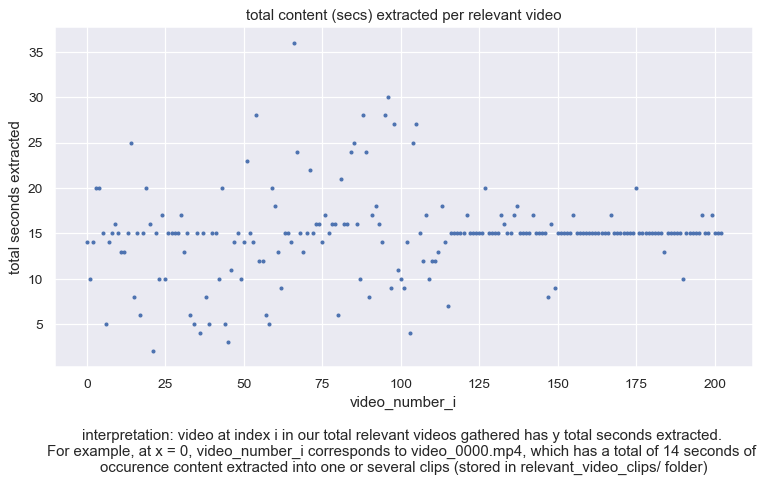

In [265]:
#plotting total content (seconds) extracted per relevant video
#this is visualing duration of total occurence content extracted per video
#for ex. from video_0000, I extracted 14 seconds of content (may be all in one clip or split across several clips)
plt.figure(figsize=(10,5), dpi=90)
plt.scatter([i for i in range(0, len(relevant_content_df))], content_per_video, s = 5)
plt.xlabel('video_number_i\n\ninterpretation: video at index i in our total relevant videos gathered has y total seconds extracted. \nFor example, at x = 0, video_number_i corresponds to video_0000.mp4, which has a total of 14 seconds of \noccurence content extracted into one or several clips (stored in relevant_video_clips/ folder)'); 

plt.ylabel('total seconds extracted'); #video_i denotes the video the total seconds extracted value belongs to (ex. video_0000 = video_i, and total secs extracted is 14)
plt.title('total content (secs) extracted per relevant video');

interpretation: video at index i in our dataframe/list of video names has y total seconds extracted. For example, at x = 0, video_number_i corresponds to video_0000.mp4, which has a total of 14 seconds of occurence content extracted into one or several clips (stored in relevant_video_clips/ folder)

In [266]:
i = 0 #for i = 100, video_number_i is video_0104.mp4, and has a total content extraction of 10 seconds (seen in our scatter plot above at video_number_i = 100)
relevant_content_df.loc[i]

video                                     video_0000.mp4
total_occurence_content_extracted_secs                14
Name: 0, dtype: object

### 2.3 | Histogram visualizing total occurence content (in seconds) extracted per videos


min content extracted from a single video:  2
mean content extracted from a single video:  14.881773399014778
max content extracted from a single video:  36


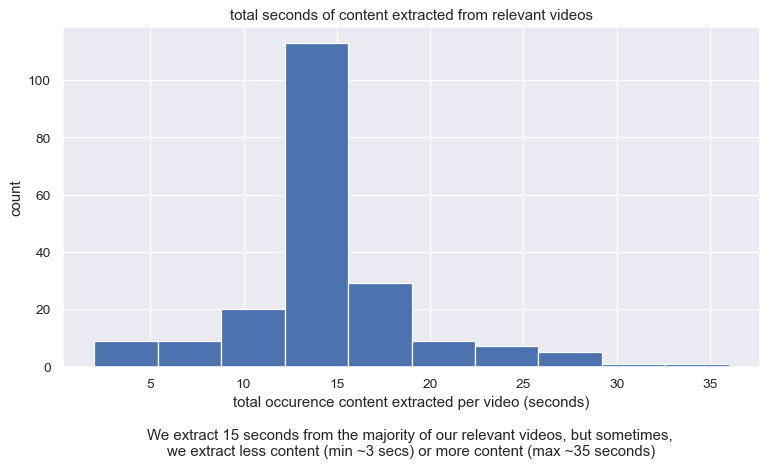

In [267]:
#this is a histogram visualizing the frequencies of duration of total occurence content extracted per videos
c = np.array(content_per_video)
print('min content extracted from a single video: ', c.min())
print('mean content extracted from a single video: ', c.mean())
print('max content extracted from a single video: ', c.max())

plt.figure(figsize=(10,5), dpi=90);
plt.hist(content_per_video);

description = '\n\nWe extract 15 seconds from the majority of our relevant videos, but sometimes, \nwe extract less content (min ~3 secs) or more content (max ~35 seconds)'

plt.xlabel('total occurence content extracted per video (seconds)' + description); plt.ylabel('count');
plt.title('total seconds of content extracted from relevant videos');

 Clarify: is this scenario ^ considered as having/being biased? Is this type of deviation acceptable/tolerable? Is this too much overrepresentation/underrepresentation of some videos over others? If this is not an ok scenario, are there any ways to prevent this/mitigate this in the future? Do we even have to worry about some videos contributing more image frames/content to the dataset than others, or is this too complicated to consider especially when taking varying frame rates (fps) into account and variability in content quality + duration? 

interpretation: there were ~100 videos where the total occurence content (encounter with humpback whale) extracted from the video was ~12-16 seconds. While most of our data is centered, meaning that for the most part we stuck to gathering about 10-20 seconds of occurence content in total, there is still some spread in our histogram which means that there were various instances where we either fell short of gathering a total of at least 10 seconds of occurence content, or on the other extreme, we got a bit excited and gathered more than 20 seconds of total video content from a single clip (on multiple occasions/for multiple videos)

if we had the ideal scenario, which is to strictly adhere to a fixed interval of total content extracted (secs), then we would've had a single peak/bar at our interval duration (10-20 seconds). But because we deviated, we end up with a spread out distribution of total occurence content extracted from relevant videos. 

In [111]:
# should repeat the plot above ^ for irrelevant videos, although for these videos, we extracted exactly 15 seconds of content for each video uniformly (at randomized intervals)
# [ADD CODE HERE]

### 2.4 | Total Frames Extracted Per Relevant Video (TRAIN SET ONLY)

- This will help us determine how to standardize the number of frames per video so we have uniform representations of each video

In [14]:
# load in train dataset to do num frames extracted EDA on
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')

X_train.set_index('Unnamed: 0', inplace=True)
X_train.index.name = 'index'

y_train.set_index('Unnamed: 0', inplace=True)
y_train.index.name = 'index'

In [17]:
#plot total frames extracted per relevant video (TRAIN SET ONLY)
## to find frames belonging to our videos in our train set, use names ['renamed_title'] from X_train 
## to find frames in relevant_image_frames

#get rows in X_train corresponding to relevant videos 
X_train_relevant = X_train.loc[list(y_train[y_train == True].dropna().index)].copy(deep=True)
X_train_relevant.reset_index(inplace=True)

#this is where we will store videos + num total frames for visualization
total_frames_per_video_rel = pd.DataFrame({'video': [video for video in X_train_relevant['renamed_title']], 
                                        'total_num_frames' : [None for i in range(0, len(X_train_relevant))]})

#where our frames (relevant) are
frame_folder = 'old_material/video_clips_sep_folders/relevant_image_frames/'

# for v in X_train['renamed_title'][0:2]:

for i, row in X_train_relevant.iterrows():

    #get base of video name ('video_XXXX')
    video_name = row['renamed_title'].split('.mp4')[0]

    #get a count of all the frames with video_name in its name 
    video_frames = [frame for frame in glob.glob(frame_folder + video_name + '*.jpg')] 
    count = len(video_frames)

    # print(count)
    # print(video_frames)

    total_frames_per_video_rel.at[i, ('total_num_frames')] = count

total_frames_per_video_rel


,video,total_num_frames
0,video_0072.mp4,47
1,video_0702.mp4,30
2,video_0646.mp4,35
3,video_0089.mp4,61
4,video_0697.mp4,32
...,...,...
157,video_0070.mp4,28
158,video_0795.mp4,20
159,video_0640.mp4,32
160,video_0801.mp4,36


                     Total Frames Per Video Stats                     
--------------------------------------------------------------------------------
|       Min       |      Mean       |     Median      |       Max      |
--------------------------------------------------------------------------------
           5.00           32.37           31.50           108.00
--------------------------------------------------------------------------------


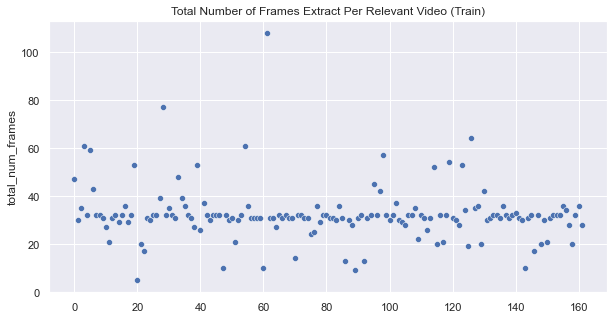

In [18]:
## plotting our total num frames per video
import seaborn as sns

print(' '*20, 'Total Frames Per Video Stats', ' ' * 20)
print('-'*80)
print('| {:^15} | {:^15} | {:^15} | {:^15}|'.format('Min','Mean','Median',' Max',))
print('-'*80)

print('{:>15.2f} {:>15.2f} {:>15.2f}  {:>15.2f}'.format(
                                                        total_frames_per_video_rel.total_num_frames.min(),
                                                        total_frames_per_video_rel.total_num_frames.mean(),
                                                        np.median(total_frames_per_video_rel.total_num_frames),
                                                        total_frames_per_video_rel.total_num_frames.max()
                                                        ))
print('-'*80)

x_labels = [i for i in range(0, len(total_frames_per_video_rel))]

sns.set(rc={'figure.figsize':(10, 5)});
ax = sns.scatterplot(x = x_labels, y = 'total_num_frames', data= total_frames_per_video_rel);
ax.set(title= 'Total Number of Frames Extract Per Relevant Video (Train)');

                               Total Frames Per Video Stats                               
------------------------------------------------------------------------------------------
|       Min       |      Mean       |     Median      |       Max      |      Mode      |
------------------------------------------------------------------------------------------
           5.00           32.37           31.50           108.00           32.00
------------------------------------------------------------------------------------------


/Users/michelleramirez/opt/anaconda3/envs/geo_env_ML/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


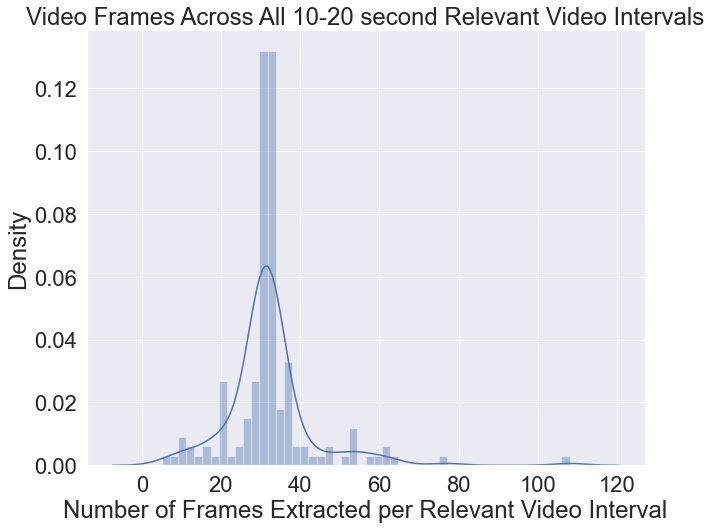

In [37]:
from statistics import mode

print(' '*30, 'Total Frames Per Video Stats', ' ' * 30)
print('-'*90)
print('| {:^15} | {:^15} | {:^15} | {:^15}| {:^15}|'.format('Min','Mean','Median',' Max', 'Mode'))
print('-'*90)

print('{:>15.2f} {:>15.2f} {:>15.2f}  {:>15.2f} {:>15.2f}'.format(
                                                        total_frames_per_video_rel.total_num_frames.min(),
                                                        total_frames_per_video_rel.total_num_frames.mean(),
                                                        np.median(total_frames_per_video_rel.total_num_frames),
                                                        total_frames_per_video_rel.total_num_frames.max(),
                                                        mode(total_frames_per_video_rel.total_num_frames)
                                                        ))
print('-'*90)

sns.set(rc={'figure.figsize':(10,8)}, font_scale = 2)
# ax = sns.histplot(data= total_frames_per_video['total_num_frames']);
ax = sns.distplot(np.array(total_frames_per_video_rel['total_num_frames'], dtype='float'));

# description = '''\n\nDecision to standardize number of frames across (relevant) videos: Input (standard) size = 40 frames per video.\n Videos with < 40 frames, we will pad with 0's (black frames). Videos with > 40 frames, we will cut down to 40 frames by removing the frames from 'the front' of the video.\n
# Why 40? I want to minimize the number of videos that we have to remove frames from, especially since these relevant clips were chosen through occurence intervals. \n We don't want to lose too much information by cutting out frames that may potentially be important. I would rather pad videos that are short of
# 40 frames with zeros as long as we get to keep all our frames for those videos. '''
description = ""
ax.set(title= 'Video Frames Across All 10-20 second Relevant Video Intervals', xlabel = 'Number of Frames Extracted per Relevant Video Interval' + description );


# plt.tight_layout()
plt.savefig('data preprocessing figures/relevant_frames_histogram')

### Interpretation of histogram above *(Note: This is for relevant videos in train set)*: 

Most of our videos have 30-35 total frames extracted from the video. The max total frames extracted for any one video is 128 frames. The min total frames extracted for any one video is 5 frames. 

To address these inconsistencies: restrict number of frames to 33 (avg). For videos that have less than 33 frames, pad with zeros (see keras tutorial)

In [323]:
#decision: in out deep learning application, we want to standardize so input size of videos (num frames) is 40 frames per video (mode number of frames extracted per video)

#number of videos with more than 32 frames = 39 videos   --> will have to remove extra frames down to only 32 (remove frames from the 'front'/beginning end of the video)
#number of videos with less than 32 frames = 80 videos   --> will have to pad these with 0's (black frames)
#number of videos with exactly   32 frames = 43 videos

#number of videos with more than 40 frames = 18 videos   --> will have to remove extra frames down to only 32 (remove frames from the 'front'/beginning end of the video)
#number of videos with less than 40 frames = 144 videos   --> will have to pad these with 0's (black frames)
#number of videos with exactly   40 frames = 0 videos

total_frames_per_video_rel.total_num_frames.value_counts()
len(total_frames_per_video_rel[total_frames_per_video_rel.total_num_frames < 40])


144

In [324]:
#these are the videos we will have to cut down to 40 frames total
total_frames_per_video_rel[total_frames_per_video_rel.total_num_frames > 40]

,video,total_num_frames
0,video_0072.mp4,47
3,video_0089.mp4,61
5,video_0099.mp4,59
6,video_0003.mp4,43
19,video_0014.mp4,53
28,video_0067.mp4,77
33,video_0052.mp4,48
39,video_0090.mp4,53
54,video_0055.mp4,61
61,video_0004.mp4,108


Decision to standardize number of frames across (relevant) videos: Input (standard) size = 40 frames per video
- videos with < 40 frames --> pad with 0's (black frames)
- videos with > 40 frames --> cut down to 40 frames by removing the frames from 'the front' of the video

Why 40? I want to minimize the number of videos that we have to remove frames from, especially since these relevant clips were chosen through occurence intervals. We don't want to lose too much information by cutting out frames that may potentially be important. I would rather pad videos that are short of 40 frames with zeros as long as we get to keep all our frames for those videos. 

### 2.5 | Total Frames Extracted Per Irrelevant Video (TRAIN SET ONLY)

In [21]:
# plot total frames extarcted per irrelevant video

# load in train dataset to do num frames extracted EDA on
# X_train = pd.read_csv('data/X_train.csv')
# y_train = pd.read_csv('data/y_train.csv')

#get rows in X_train corresponding to relevant videos 
X_train_irrelevant = X_train.loc[list(y_train[y_train == False].dropna().index)].copy(deep=True)
X_train_irrelevant.reset_index(inplace=True)

#this is where we will store videos + num total frames for visualization
total_frames_per_video_irrel = pd.DataFrame({'video': [video for video in X_train_irrelevant['renamed_title']], 
                                             'total_num_frames' : [None for i in range(0, len(X_train_irrelevant))]})

#where our frames (relevant) are
frame_folder = 'old_material/video_clips_sep_folders/irrelevant_image_frames/'

# for v in X_train['renamed_title'][0:2]:

for i, row in X_train_irrelevant.iterrows():

    #get base of video name ('video_XXXX')
    video_name = row['renamed_title'].split('.mp4')[0]

    #get a count of all the frames with video_name in its name 
    video_frames = [frame for frame in glob.glob(frame_folder + video_name + '*.jpg')] 
    count = len(video_frames)

    # print(count)
    # print(video_frames)

    total_frames_per_video_irrel.at[i, ('total_num_frames')] = count

total_frames_per_video_irrel


,video,total_num_frames
0,video_0132.mp4,31
1,video_0816.mp4,32
2,video_0563.mp4,30
3,video_0782.mp4,32
4,video_0501.mp4,31
...,...,...
158,video_0612.mp4,31
159,video_0736.mp4,30
160,video_0537.mp4,32
161,video_0751.mp4,31


                               Total Frames Per Video Stats (Irrel)                               
------------------------------------------------------------------------------------------
|       Min       |      Mean       |     Median      |       Max      |      Mode      |
------------------------------------------------------------------------------------------
           3.00           31.10           31.00            33.00           32.00
------------------------------------------------------------------------------------------


/Users/michelleramirez/opt/anaconda3/envs/geo_env_ML/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


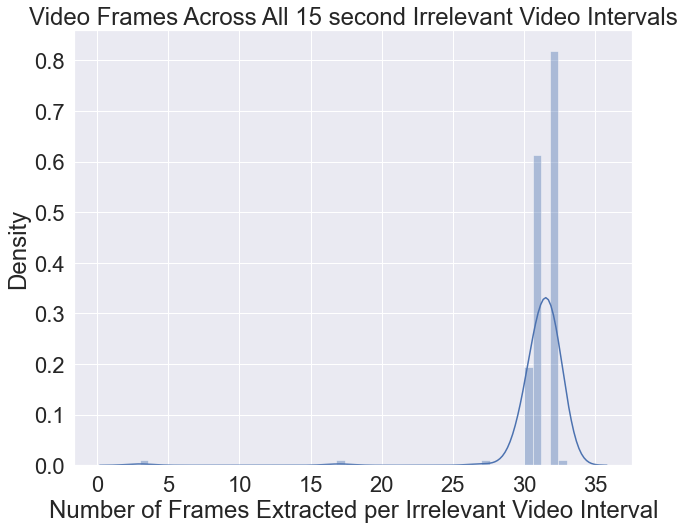

In [36]:
from statistics import mode

print(' '*30, 'Total Frames Per Video Stats (Irrel)', ' ' * 30)
print('-'*90)
print('| {:^15} | {:^15} | {:^15} | {:^15}| {:^15}|'.format('Min','Mean','Median',' Max', 'Mode'))
print('-'*90)

print('{:>15.2f} {:>15.2f} {:>15.2f}  {:>15.2f} {:>15.2f}'.format(
                                                        total_frames_per_video_irrel.total_num_frames.min(),
                                                        total_frames_per_video_irrel.total_num_frames.mean(),
                                                        np.median(total_frames_per_video_irrel.total_num_frames),
                                                        total_frames_per_video_irrel.total_num_frames.max(),
                                                        mode(total_frames_per_video_irrel.total_num_frames)
                                                        ))
print('-'*90)

sns.set(rc={'figure.figsize':(10,8)}, font_scale=2)
# ax = sns.histplot(data= total_frames_per_video['total_num_frames']);
ax = sns.distplot(np.array(total_frames_per_video_irrel['total_num_frames'], dtype='float'));

# description = '''\n\n\nFor our irrelevant (train) videos, each has less than 35 total frames extracted,\n so setting input size of all videos (rel + irrel) for our neural nets to 40 frames per video,\nand padding those with less than 40/ cutting down those with more than 40 to 40, will be our strategy \nfor standardizing our video input dimensions.'''
description = ""
ax.set(title= 'Video Frames Across All 15 second Irrelevant Video Intervals', xlabel = 'Number of Frames Extracted per Irrelevant Video Interval' + description );

# plt.tight_layout()
plt.savefig('data preprocessing figures/irrelevant_frames_histogram')

For our irrelevant (train) videos, each has less than 35 total frames extracted, so setting input size of all videos (rel + irrel) for our neural nets to 40 frames per video, and padding those with less than 40/ cutting down those with more than 40 to 40, will be our strategy for standardizing our video input dimensions.

------

## Splitting Videos Into Train / Validation / Test Sets

In [114]:
hw_data.shape

(407, 11)

In [132]:
## before plotting total frames extracted per relevant video, let's reduce our biases by forming our datasets and doing that EDA on train set only
from sklearn.model_selection import train_test_split

df =  hw_data.copy(deep=True)

# we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = df.drop(columns = ['relevant']).copy()
y = df['relevant']

# In the first step we will split the data in training and remaining dataset
# note that we define the stratify parameter so we have an equal number of videos in our dataset
# representing relevant and nonrelevant classes
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state = 16, stratify = y)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
# note that we define the stratify parameter so we have an equal number of videos in our dataset
# representing relevant and nonrelevant classes
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state = 16, stratify= y_rem)

#print information out
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(325, 10)
(325,)
(41, 10)
(41,)
(41, 10)
(41,)


(None, None)

In [139]:
y_train.value_counts() #163 - nonrelevant videos, 162 - relevant videos in our train set

False    163
True     162
Name: relevant, dtype: int64

In [137]:
#save X_train, y_train, X_valid, y_valid, X_test, y_test to csvs

X_train.to_csv('data/X_train.csv')
y_train.to_csv('data/y_train.csv')

X_valid.to_csv('data/X_valid.csv')
y_valid.to_csv('data/y_valid.csv')

X_test.to_csv('data/X_test.csv')
y_test.to_csv('data/y_test.csv')

print('Done saving train/valid/test datasets to csvs')

Done saving train/valid/test datasets to csvs
